# Lecture 7: Visualización de Datos (Data Vizualitation - DataViz)

La visualización de datos es uno de los elementos más importantes de la visualización de datos.

In [1]:
# Importando librerías

## Librerías para graficar
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Librerías sobre warnings
import warnings 

# Opciones
warnings.filterwarnings("ignore")
sns.set(style="white", color_codes=True)

# 1. Importar los datos

Vamos a descargar una base de datos de prueba. Estas bases de datos están dentro de los paquetes de Python y son bases de datos "bien comportadas". Es decir, son bases de datos que no tienen errores considerables dentro de la conformación de los datos y que tienen poca o nula pérdida de información. Aún así, para este caso es mejor utilizar una base de datos de este tipo, ya que nos centraremos en graficar y no en limpieza y preprocesamiento de datos.

Para este caso, utilizaremos `Iris`: una base de datos recogida por el estadistico y biólogo Ronald Fisher sobre 50 muestras de flores. En ella hay 3 tipos de flores, los cuales se pueden medir en 4 características. Con esta información, Fisher realizó un modelo linear para clasificar los tipos de flores.

Vamos a explorarla:

In [2]:
# pip install sklearn

In [3]:
# Importamos sklearn, la cual más adelante volveremos a tomar
from sklearn import datasets

# Importamos la base de datos
iris = datasets.load_iris()

Siempre se puede cargar la base de datos de un csv, pero también es importante que aprendamos cómo sacar bases de datos desde paquetes como `sklearn` para practicar con este tipo de bases. Ahora, si intentamos observar qué hay dentro de `iris`, ¿qué observamos?

In [4]:
# Observe qué tiene la base de datos de iris

Debemos realizarle unos procesos:

In [5]:
# Creamos el data frame
data = pd.DataFrame(iris.data) # Se convierte los datos en dataframe
data['class'] = iris.target # Le agregamos el vector de la clase
data.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'clase'] # Renombramos columnas

# Observamos
data.head(10)

,sepal_len,sepal_wid,petal_len,petal_wid,clase
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


Ahora, no es como necesitamos la base de datos, entonces carguemos la base de datos de un .csv de [Kaggle](https://www.kaggle.com/datasets/uciml/iris?resource=download):

In [6]:
iris = pd.read_csv("datain/Iris.csv")
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# 2. Mini EDA

Revisemos un poco de la base de datos. En este caso, la batuta la tienen ustedes. Solo hagamos un paseo sobre lo esencial:

## 2.1. Características básicas de la base de datos

Revisemos cuántas observaciones y columnas hay

In [7]:
iris.shape

(150, 6)

## 2.2. Calidad de la información

Revisemos cuántos valores perdidos tiene la base de datos

In [8]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Revisemos cuántos valores únicos tiene cada una de las columnas

In [9]:
iris.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

Revisemos qué columnas tenemos: ¿qué significa cada una?

In [10]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

Revisemos las clases: ¿qué tipo de clases hay? ¿Sí son 3?

In [11]:
iris.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Revisemos los tipos de datos que tenemos en nuestra base de datos: ¿qué tipos de datos tenemos? ¿Son los que necesitamos?

In [12]:
iris.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [13]:
iris.Species = pd.Categorical(iris.Species)

## 3. Visualization

## 3.1. Principios de la visualización

La visualización no es una tarea fácil. Para visualizar datos, debemos tener muy claros los conceptos que ellos involucran en nuestra cabeza y, además, saber cómo ponerlo en términos entendibles a otras personas. Ello es sumamente difícil, ya que tenemos que ponernos en la mente de otras personas para saber cómo hacer la mejor visualización. 

Schwabish (2021), propone los Principios de Gestalt de la percepción visual para ayudarnos a entender cómo pensamos y percibimos lo visual como humanos para construir mejores gráficas. Estos principios son:

1. **Proximidad:** percibimos los objetos cercanos entre ellos como pertenecientes a un grupo.
2. **Similitud:** los humanos agrupan objetos que comparten el mismo color, forma y dirección.
3. **Agrupación:** objetos encerrados son percibidos como grupos.
4. **Completitud:** nuestros cerebros ignoran las brechas y completa las estructuras.
5. **Continuidad:** objetos que están alineados juntos o se dan continuidad entre ellos son percibidos como un grupo.
6. **Conexión:** percibimos los objetos conectados como un mismo grupo.

Hay 5 líneas de acción para hacer una buena gráfica:

1. Muestra los datos.
2. Reduce el desorden.
3. Integra gráficas y texto.
4. Evita el gráfico spaguetti.
5. Empieza con gris

## 3.2. Taxonomía y arquitectura de una gráfica

### 3.2.1. El lienzo de las gráficas en Python

Las gráficas, en programación, son bastantes lógicas: se construyen en orden. Las gráficas en Python, específicamente con `matplotlib` y `seaborn` se crean como si fuera un lienzo: primero tenemos el lienzo, después vamos agregándole pintura, color, entre otros. Por ejemplo, podemos crear una gráfica sin nada con el método `plt.plot()`:

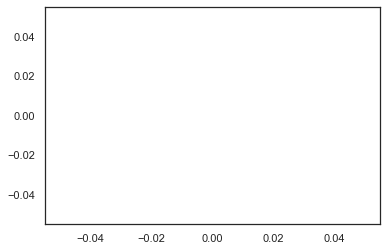

In [14]:
import matplotlib.pyplot as plt

plt.plot()

plt.show()

> La función `plt.show()` es utilizada como el `print()` de las gráficas. Es decir, muestra la gráfica que hemos construido.

Como podemos observar, no tiene nada: está vacío. Como no le hemos agregado datos, es como tener el lienzo y aún no pintarle nada. Para ello, podemos utilizar múltiples tipos de pintura: scatterplots, boxplots, lineplots, piecharts, entre otros. 

> **La elección del tipo de gráfica a utilizar es un arte y una ciencia: cada gráfica presenta y resalta los datos de manera diferente. Para escoger la gráfica adecuada, debemos entender nuestros datos, la utilidad de cada forma de presentación y alinearlo con nuestro propósito.**

Vamos a utilizar pedagógicamente una forma básica de datos para entender cómo podemos manejar la gráfica a nuestro antojo ara resaltar uno u otro aspecto de nuestros datos. En este caso, utilizaremos el **gráfico de dispersión** (o _scatterplot_). Más adelante ahondaremos en otro tipo de gráficos.

Creemos entonces el primer gráfico de dispersión con la función `plt.scatter()`, comparando el largo de los sépalos (`SepalLengthCm`) y el ancho de los sépalos (`SepalWidthCm`):

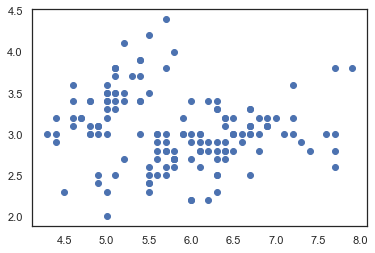

In [15]:
import matplotlib.pyplot as plt

# Creamos un scatterplot básico
plt.scatter(x = 'SepalLengthCm', y = 'SepalWidthCm', data = iris)

# Mostramos la gráfica
plt.show()

Podemos cambiarle el tamaño a la gráfica con el método `plt.figure()`, con la opción de `figsize = (ancho, largo)`. Veamos cómo funciona:

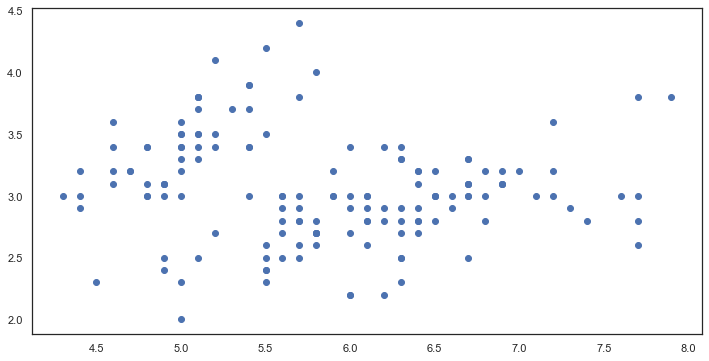

In [16]:
import matplotlib.pyplot as plt

# Establecemos el tamaño de la gráfica
plt.figure(figsize = (12, 6))

# Creamos un scatterplot básico
plt.scatter(x = 'SepalLengthCm', y = 'SepalWidthCm', data = iris)

# Mostramos la gráfica
plt.show()

Otros elementos pueden ser cambiados en `plt.figure()`. Explóralos.

### 3.2.2. Los primeros brochazos a nuestras gráficas: título y etiquetas de los ejes

Ya construimos una gráfica simple: nos muestra la relación entre el ancho y largo del sépalo a partir de las observaciones y mediciones que tiene la base de datos. Para nosotros resulta entendible. No obstante, para una persona externa puede no ser clara: ¿qué se está comparando? ¿Cómo sabe cuál es el eje para el ancho y cuál es el eje para el largo del sépalo?

Por ello, debemos hacerle unos cambios de aclaración. Empecemos con el título de la gráfica, el cual podemos establecer con `plt.title()`:

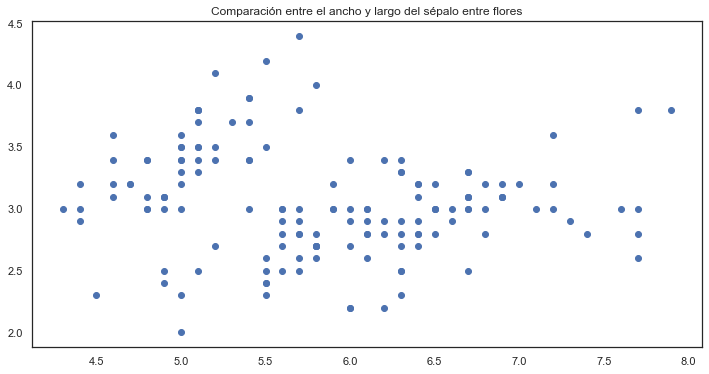

In [17]:
import matplotlib.pyplot as plt

# Establecemos el tamaño de la gráfica
plt.figure(figsize = (12, 6))

# Creamos un scatterplot básico
plt.scatter(x = 'SepalLengthCm', y = 'SepalWidthCm', data = iris)

# Añadimos el título
plt.title('Comparación entre el ancho y largo del sépalo entre flores')

# Mostramos la gráfica
plt.show()

Al parecer está un poco pequeña la letra. Podemos cambiar esa opción dentro de `plt.title()`, además de otras cosas como su posición, si está en cursiva o negrilla, entre otros. Veamos esas opciones:

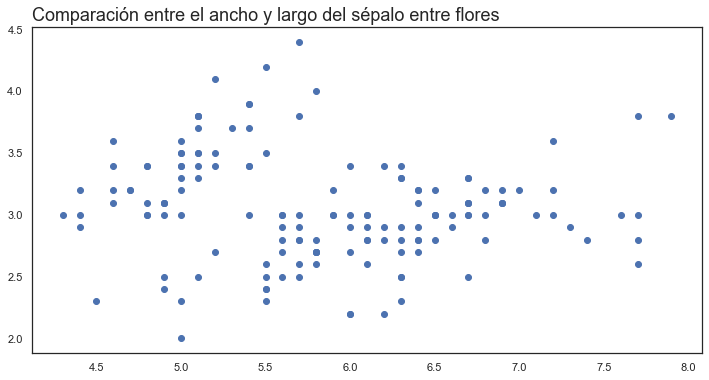

In [18]:
import matplotlib.pyplot as plt

# Establecemos el tamaño de la gráfica
plt.figure(figsize = (12, 6))

# Creamos un scatterplot básico
plt.scatter(x = 'SepalLengthCm', y = 'SepalWidthCm', data = iris)

# Añadimos el título
plt.title(label = 'Comparación entre el ancho y largo del sépalo entre flores', loc = 'left', fontsize = 18)

# Mostramos la gráfica
plt.show()

Ahora queda más claro, pero no queda explícito cuál es el eje para el ancho del sépalo y cuál para el largo del sépalo. Las funciones `plt.xlabel()` y `plt.ylabel()` permiten establecer el texto que aparece como títulos de los ejes:

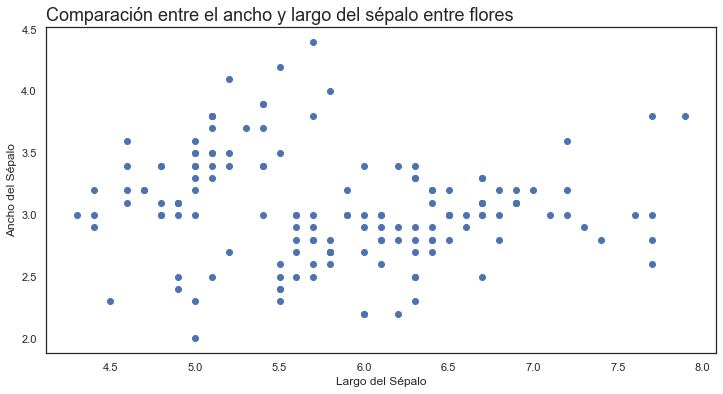

In [19]:
import matplotlib.pyplot as plt

# Establecemos el tamaño de la gráfica
plt.figure(figsize = (12, 6))

# Creamos un scatterplot básico
plt.scatter(x = 'SepalLengthCm', y = 'SepalWidthCm', data = iris)

# Añadimos el título
plt.title(label = 'Comparación entre el ancho y largo del sépalo entre flores', loc = 'left', fontsize = 18)

# Añadimos las etiquetas de los ejes
plt.xlabel('Largo del Sépalo'); plt.ylabel('Ancho del Sépalo')

# Mostramos la gráfica
plt.show()

También se pueden cambiar los valores del tamaño, de la negrilla o cursiva, entre otros. En esta ocasión, parece adecuada la forma en la que está, pero te invito a que lo explores.

### 3.2.3. ¿Cómo guardar nuestra obra de arte?

Ahora querremos seguramente guardar lo que hemos hecho. Para ello utilizaremos la función `plt.savefig()`, como se muestra a continuación:

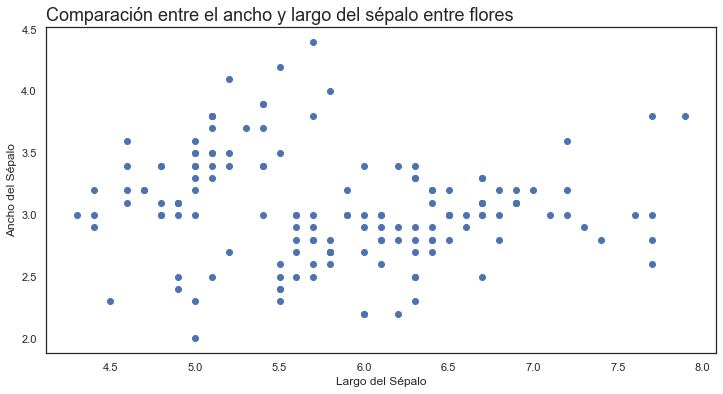

In [20]:
import matplotlib.pyplot as plt

# Establecemos el tamaño de la gráfica
plt.figure(figsize = (12, 6))

# Creamos un scatterplot básico
plt.scatter(x = 'SepalLengthCm', y = 'SepalWidthCm', data = iris)

# Añadimos el título
plt.title(label = 'Comparación entre el ancho y largo del sépalo entre flores', loc = 'left', fontsize = 18)

# Añadimos las etiquetas de los ejes
plt.xlabel('Largo del Sépalo'); plt.ylabel('Ancho del Sépalo')

# Guardamos nuestra gráfica
plt.savefig('output/iris_plot.jpg')

# Mostramos la gráfica
plt.show()

> ¡El `plt.savefig()` debe ir antes del `plt.show()`! Caso contrario, no guardará el archivo porque _ya lo ha mostrado_, _ya cumplió su cometido_.

Con esta función podemos guardar nuestras obras de arte. Podemos cambiarle varias opciones al guardar, como la resolución de la imagen, el tamaño, entre otros. 

# 4 Tipos de gráficas

Ahora que hemos visto los principios básicos en la teoría y práctica para construir gráficas, podemos ver tipos específicos de gráficas para saber utilizarlas de la mejor manera. En ese sentido, veremos los tipos de gráficas más utilizadas en la Ciencia de Datos, incluyendo sus ventajas y desventajas, cómo generarlas, algunas opciones y recomendaciones, entre otras cosas.

¡Manos a la obra!

## 4.3. Gráficos de dispersión (scatterplot)

Son gráficos simples que demuestran los puntos en un plano cartesiano de un par (o n cantidad) de variables. Ayudan a mostrar la distribución de una variable respecto a otra, así como mostrar posibles enclaustramientos. Tenemos varias formas de hacerlo. Empecemos con `matplotlib`:

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

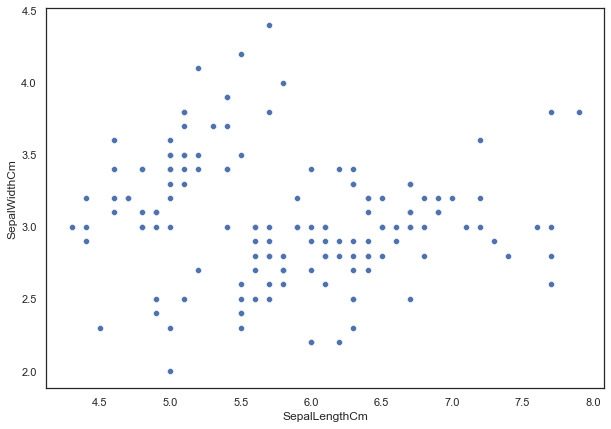

In [21]:
plt.figure(figsize = (10, 7))
sns.scatterplot(iris, x = "SepalLengthCm", y = "SepalWidthCm")

Estos también lo podemos dividir por tipo de clase de flor:

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

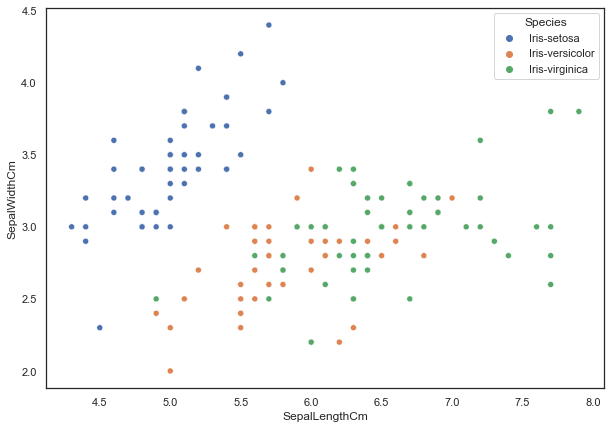

In [22]:
plt.figure(figsize = (10, 7))
sns.scatterplot(iris, x = "SepalLengthCm", y = "SepalWidthCm", hue = "Species")

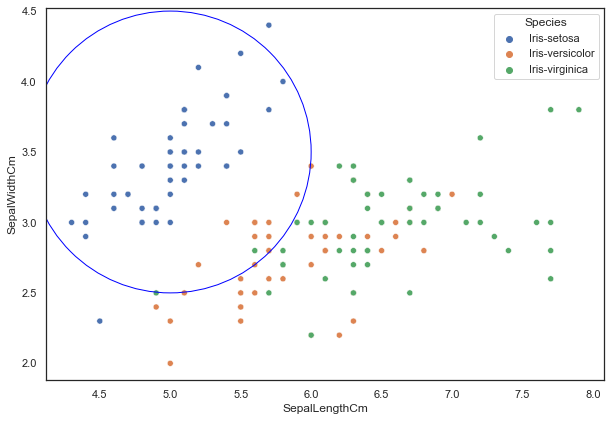

In [23]:

figure, axes = plt.subplots(figsize = (10, 7))
sns.scatterplot(iris, x = "SepalLengthCm", y = "SepalWidthCm", hue = "Species")

circle = plt.Circle((5, 3.5), 1, color = "blue", fill = False )
 
axes.set_aspect(1)
axes.add_artist(circle)
plt.show()

### 3.3.1. Gráficos de dispersión con gráficos de densidad

Los gráficos de dispersión se puede combinar con gráficos de densidad en la misma gráfica.

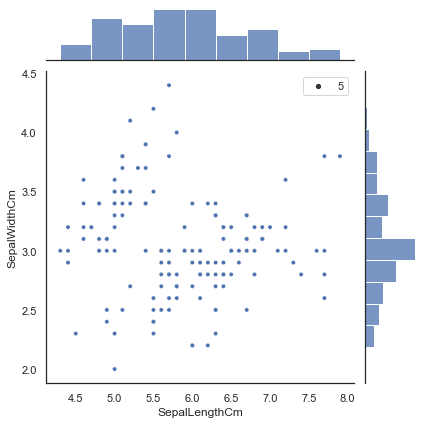

In [24]:
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=iris, size=5)
plt.show()

### 3.3.2. Cambios en la visualización de los puntos

Podemos cambiar los puntos por otras formas. Veamos qué formas tenemos:

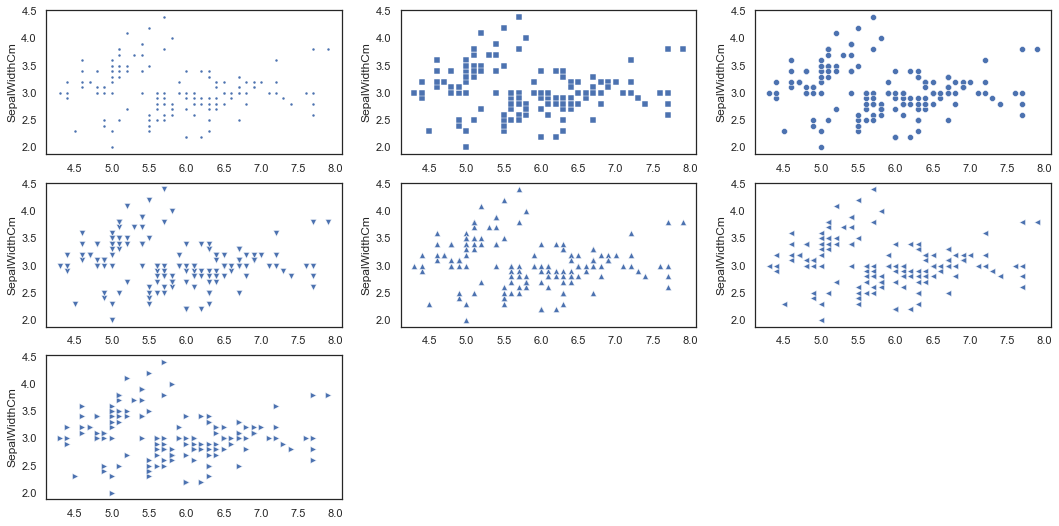

In [25]:
# Lista de todos los marcadores
markers = ["." , "," , "o" , "v" , "^" , "<", ">"]

# Tamaño
plt.figure(figsize = (18, 9))

# Se hace un ciclo
for i, var in enumerate(markers):
    plt.subplot(3, 3, i+1) # Se ubica cada gráfica en una subgráfica
    sns.scatterplot(iris, x = "SepalLengthCm", y = "SepalWidthCm", marker = markers[i]) # Se construye la gráfica
    plt.xlabel("")

Ahora, podemos construir una gráfica que tenga los diferentes grupos con diferentes colores y formas para hacer más fácil el análisis.

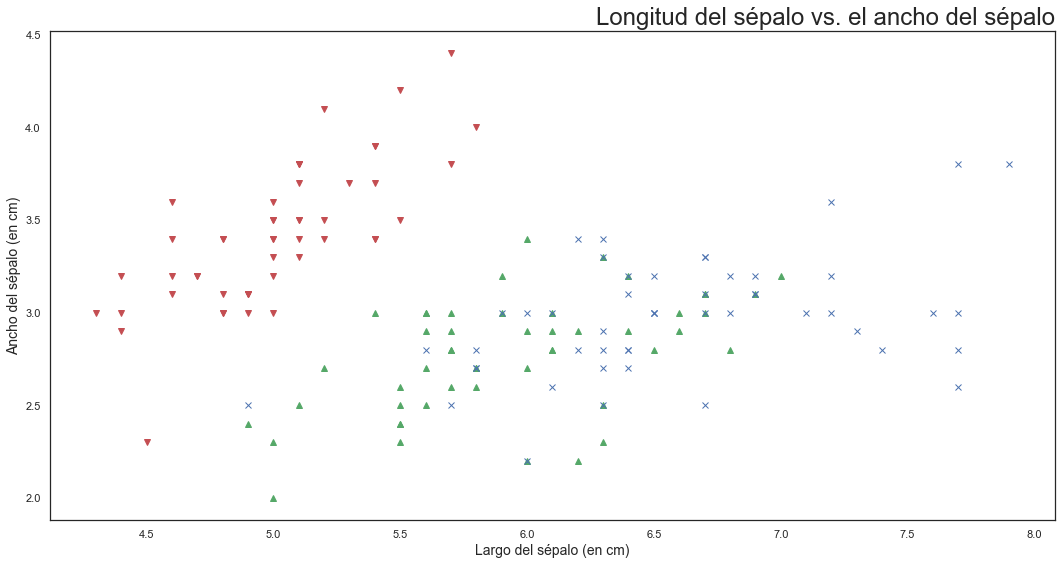

In [26]:
# Lista de todos los marcadores y colores
markers = ["v" , "^" , "x", ">"]
colors = ['r','g','b','c','m', 'y', 'k']

# Tamaño
plt.figure(figsize = (18, 9))

# Se hace un ciclo
for i, specie in enumerate(iris.Species.unique()):
    df_temp = iris[iris.Species == specie]
    plt.plot(df_temp.SepalLengthCm, df_temp.SepalWidthCm, marker = markers[i], linestyle = '', color = colors[i])
    
plt.title("Longitud del sépalo vs. el ancho del sépalo", size = 24, loc = "right")
plt.xlabel("Largo del sépalo (en cm)", size = 14);plt.ylabel("Ancho del sépalo (en cm)", size = 14)
plt.show()

## 3.4. Gráficos de Caja (Boxplot)

Un gráfico de Caja, mejor conocidos como _boxplots_ son un método gráfico para visualizar la localidad, dispersión y asimetría de los datos a través de sus cuartiles. En ese sentido, muestra la distribución de los datos a partir de varios elementos: el cuartil 1 (25% de los datos), el cuartil 3 (75% de los datos), la media y los "bigotes".

<br>
<center> <img src = "https://miro.medium.com/max/9000/1*2c21SkzJMf3frPXPAR_gZA.png" width="800" height="400"> </center>
<br>

En ese sentido, los "bigotes" representan aquellas zonas donde es común encontrar datos. Este se construye al multiplicar por 1.5 el rango intercuartílico ($1.5*(Q_3 - Q_1)$) y sumarlo al cuartil 3 (máximo) o restarlo al cuartil 1 (mínimo). Todo aquello que esté por fuera de esta zona se considera como datos atípicos.

En ese sentido, este diagrama es útil para analizar datos atípicos en los datos. Así mismo, es bueno para demostrar la distribución común de los mismos.

Para realizar un diagrama de caja de una sola variable, se puede utilizar el siguiente código:

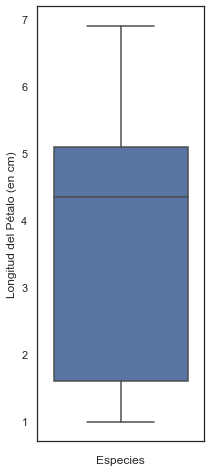

In [27]:
plt.figure(figsize = (3, 8))
sns.boxplot(y = iris["PetalLengthCm"])
plt.xlabel("Especies");plt.ylabel("Longitud del Pétalo (en cm)")
plt.show()

Ahora, para realizar una gráfica de caja de separado por variable, se puede estipular el siguiente código:

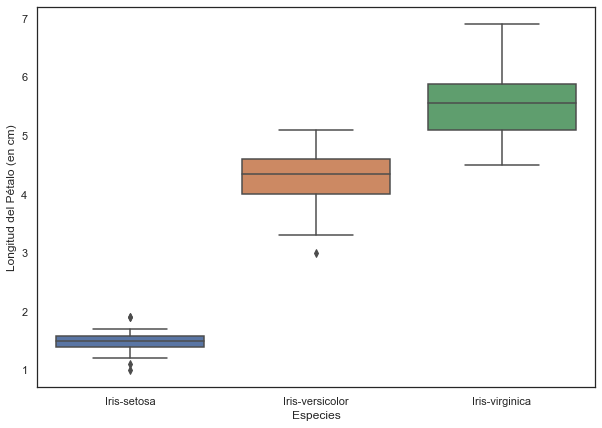

In [28]:
plt.figure(figsize = (10, 7))
sns.boxplot(x = "Species", y = "PetalLengthCm", data=iris)
plt.xlabel("Especies");plt.ylabel("Longitud del Pétalo (en cm)")
plt.show()

En este caso, ¿qué podemos observar de los datos del longitud del pétalo por especie?

Por último, se le pueden agregar los puntos de los datos, como si fuera un pequeño scatterplot:

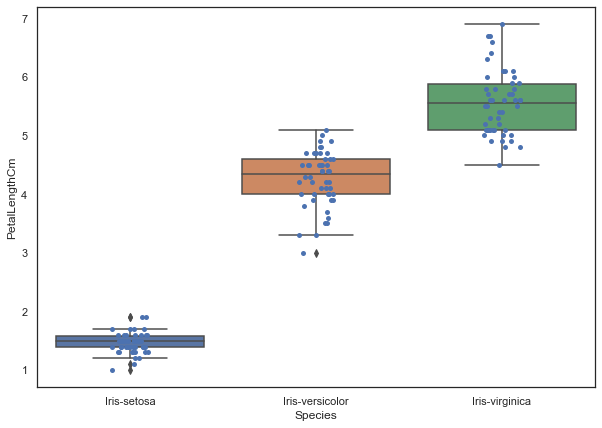

In [29]:
plt.figure(figsize = (10, 7))
ax = sns.boxplot(x="Species", y="PetalLengthCm", data=iris)
ax = sns.stripplot(x="Species", y="PetalLengthCm", data=iris, jitter=True, edgecolor="grey")
plt.show()

## 3.5. Gráficos de Violín

Los gráficos de violín funcionan muy similar a los gráficos de caja (¡los incluye!), solamente que incluyen un estimado de la densidad de los datos. Por dentro tiene un diagrama de caja común y le sobrepone una estimación de la densidad de los datos. Esto, por lo general, es estimado con una función Kernell.

<br>
<center> <img src = "https://api.www.labxchange.org/api/v1/xblocks/lb:LabXchange:46f64d7a:html:1/storage/28__violin-plot-11626365603605-77f9e7acf0e79c553ec92a044b91b6b1.png" width="500" height="300"> </center>
<br>

Este tipo de gráficos funciona para analizar la distribucion de los datos en sus pesos: es decir, dónde se recuestan los datos. El gráfico de caja tiene un problema al respecto, ya que se le pueden agregar los puntos de los datos, pero no estima densidades y puede ser confuso. Por su parte, la gráfica de violín no encuentra precisamente dónde están los datos atípicos (aunque los muestra), a lo que es más preciso el gráfico de caja.

Este gráfico puede crearse en el siguiente código:


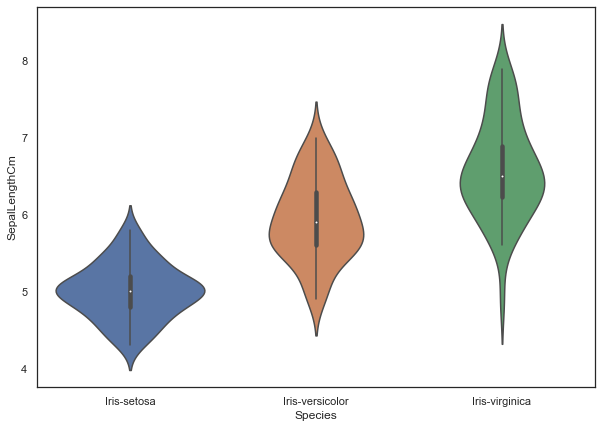

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10, 7))
sns.violinplot(x="Species", y="SepalLengthCm", data=iris, size=6)
plt.show()

## 3.6. Gráficos de barras

Los gráficos de barras son métodos de visualización que recogen la densidad de unos datos en intervalos numéricos. Estos pueden representar datos en diferentes momentos (serie de tiempo) o en un mismo momento (corte longitudinal).

Este tipo de gráficos basan sus ventajas en su facilidad de comprensión y la facilidad de construcción. Así mismo, muestra de manera efectiva los datos que se quieran procesar.

Para generarlo, podemos realizar el siguiente código:

<AxesSubplot:xlabel='Species', ylabel='SepalLengthCm'>

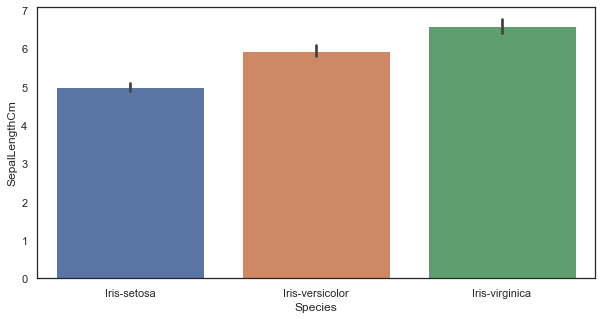

In [31]:
fig = plt.figure(figsize = (10, 5))
sns.barplot(data = iris, x="Species", y="SepalLengthCm", estimator='mean')

En este caso se tiene un **valor promedio**. Se le puede cambiar por la suma, la media, entre otros.

Sin embargo, para mostrar mejor las características de gráficas de series de tiempo, utilicemos la base de datos del Banco Mundial del PIB a precios actuales del dólar (PIB Nominal).

In [34]:
# Cambiando configuración para mostrar todas las columnas y en notación estándar (no científica)
pd.set_option('display.float_format', lambda x: '%.0f' % x)
pd.set_option('display.max_columns', None)

# Descargando los datos
gdp = pd.read_csv("Datain/GDP_countries.csv", delimiter = ",", skiprows = 4)

# Borrando la última columna
gdp = gdp.drop("Unnamed: 66", axis = 1)
gdp

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,405586592,487709497,596648045,695530726,764804469,872067039,958659218,1083240223,1245810056,1320670391,1379888268,1531843575,1665363128,1722905028,1873184358,1896648045,1962011173,2044134078,2254748603,2359776536,2469832402,2677653631,2843016760,2553631285,2453631285,2637988827,2615083799,2727932961,2791061453,2963128492,2983798883,3092178771,3202234637,3310055866,2496648045,NaN
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,21290586003,21808473825,23707015394,28210036878,26118787467,29682172751,32239121547,33514552047,36521482937,41828336213,44862605393,49478916698,53514844534,69600788111,86057777551,91649152687,91124551926,103415844082,115345041830,134671404725,170654335897,174387007968,167266313061,174918045687,160133966254,136297338030,152518294684,186144649622,204139844557,217538592169,253224041095,273402805409,238255441288,236526919099,240120093425,269636854386,268413689898,282184986870,265814093140,262172198957,283925424525,258818573323,264869812959,352658503931,438833793854,512211130671,575921416504,661179291210,708286928848,719216656141,860478348236,964418457188,973043454995,983937046711,1003678868707,924252536257,882355055413,1020647235171,991022252917,997534042075,921645942922,1082095608968
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,537777811,548888896,546666678,751111191,800000044,1006666638,1399999967,1673333418,1373333367,1408888922,1748886596,1831108971,1595555476,1733333264,2155555498,2366666616,2555555567,2953333418,3300000109,3697940410,3641723322,3478787909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4055179566,4515558808,5226778809,6209137625,6971285595,9747879532,10109305183,12416161049,15856678596,17805113119,19907317066,20146404996,20497126770,19134211764,18116562465,18753469630,18053228579,18799450743,20116137326,NaN
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,10404135069,11127894641,11943187848,12676330765,13838369295,14862225760,15832591204,14426038230,14880349280,16882092549,23504605476,20832817218,25264953766,31273819026,44214484997,51444731784,62129390375,65315008068,71199708192,88628401269,112031308654,211003492000,187163726213,138115204947,114262670304,116507282627,107497542341,110321770124,108943464549,101768783075,121802125422,117457060716,118282253152,98826369836,86281743753,108221319966,125763022908,127063922267,130106822587,137521000392,140410259302,148012829262,176938027370,204644531317,254092555394,310557534109,393305207803,461791382954,566480827442,507043593426,591595778367,670983030296,727570384034,820792700050,864990453539,760734474152,690546384903,683748746978,741689925173,794543045900,784445725635,835808395909
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5930503401,5550483036,5550483036,5784341596,6131475065,7553560459,7072063346,8083872012,8769250550,10201099039,11228764963,10603784541,8307810974,5768720422,4438321017,5538749260,7526446606,7648377413,6506229607,6152922943,9129594819,8936063723,15285594828,17812704825,23552047248,36970918699,52381006892,65266452081,88538610805,70307166934,81699556137,109436531427,124998158418,133401594461,137244418013,87219290029,49840494026,68972763787,77792940077,69309104807,53619071176,72546985709
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

Ahora construyamos un gráfico de barras de los años. No obstante, tenemos un problema: la base de datos no está en el formato que necesitamos. Tenemos que tener una columna con la variable de los años para poder generar la gráficas. Para esto utilizaremos  `pivot`:

In [35]:
gdp = pd.melt(gdp, id_vars = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],\
              value_vars = [str(x) for x in range(1960, 2022)], value_name = "gdp", var_name = "year", ignore_index=True)

In [36]:
gdp

,Country Name,Country Code,Indicator Name,Indicator Code,year,gdp
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,1960,NaN
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,1960,21290586003
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1960,537777811
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1960,10404135069
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,1960,NaN
...,...,...,...,...,...,...
16487,Kosovo,XKX,GDP (current US$),NY.GDP.MKTP.CD,2021,9007159196
16488,"Yemen, Rep.",YEM,GDP (current US$),NY.GDP.MKTP.CD,2021,21061691630
16489,South Africa,ZAF,GDP (current US$),NY.GDP.MKTP.CD,2021,419946428126
16490,Zambia,ZMB,GDP (current US$),NY.GDP.MKTP.CD,2021,21203059080


Sin embargo, ¡cuidado! Revisemos lo siguiente: ¿cuáles son los tipos?

In [37]:
gdp.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
year               object
gdp               float64
dtype: object

Arreglemos la columna que nos interesa:

In [38]:
gdp.year = [int(x) for x in gdp.year]

Ahora sí tenemos la base de datos en formato largo. Este nos servirá para hacer nuestras gráficas:

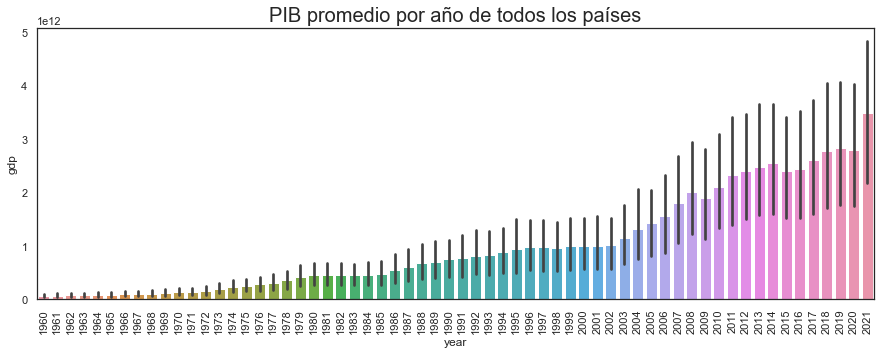

In [39]:
plt.figure(figsize = (15, 5))
sns.barplot(data = gdp, x = "year", y = "gdp", estimator='mean')
plt.title("PIB promedio por año de todos los países", size = 20)
plt.xticks(rotation = 90)
plt.show()

## 3.7. Gráficos de líneas

Los gráficos de líneas es una serie de puntos conectados por una línea. Tiene una ventaja en la visualización de datos con un sentido temporal. Por ello es que se utiliza generalmente en aquellos datos que están por meses, años, días, minutos, segundos, entre otros.

Para generarlo en Python se requiere de un código simple:

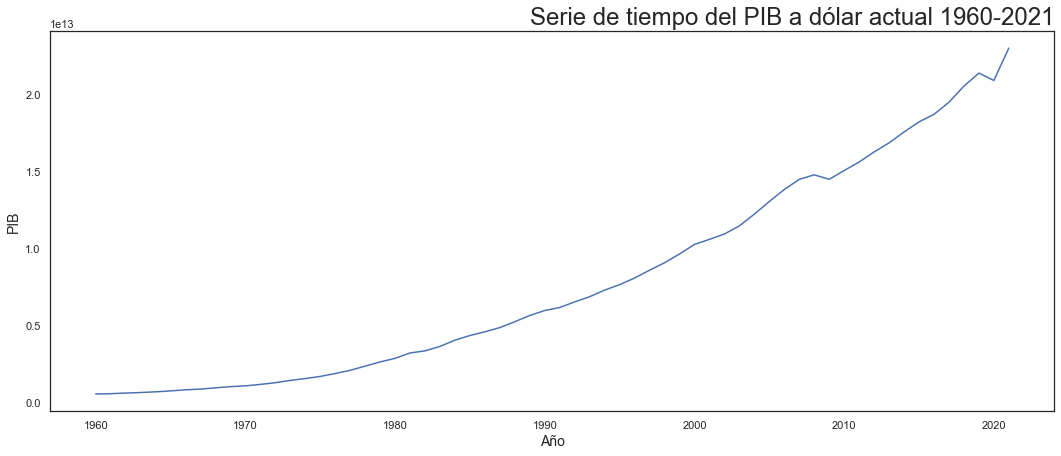

In [40]:
plt.figure(figsize = (18, 7))
sns.lineplot(data = gdp[gdp["Country Code"] == "USA"], x = "year", y = "gdp")
plt.title("Serie de tiempo del PIB a dólar actual 1960-2021", size = 24, loc = "right")
plt.xlabel("Año", size = 14); plt.ylabel("PIB", size = 14)
plt.show()

Podemos agregar varias líneas al tiempo:

<AxesSubplot:xlabel='year', ylabel='gdp'>

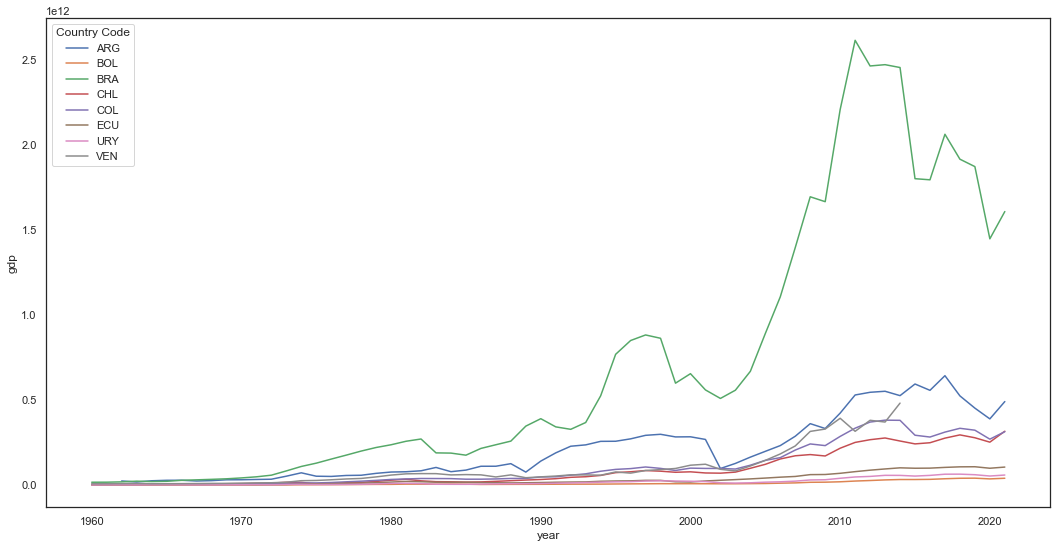

In [41]:
list_countries = ["CHL", "ARG", "COL", "BRA", "BOL", "ECU", "VEN", "URY"]
plt.figure(figsize = (18, 9))
sns.lineplot(data = gdp[gdp["Country Code"].isin(list_countries)], x = "year", y = "gdp", hue = "Country Code")
#plt.legend('', frameon = False)

A ellas podemos agregarles algunos elementos estéticos, como, por ejemplo, los puntos de cada año, que esté la línea punteada, entre otras cosas:

<AxesSubplot:xlabel='year', ylabel='gdp'>

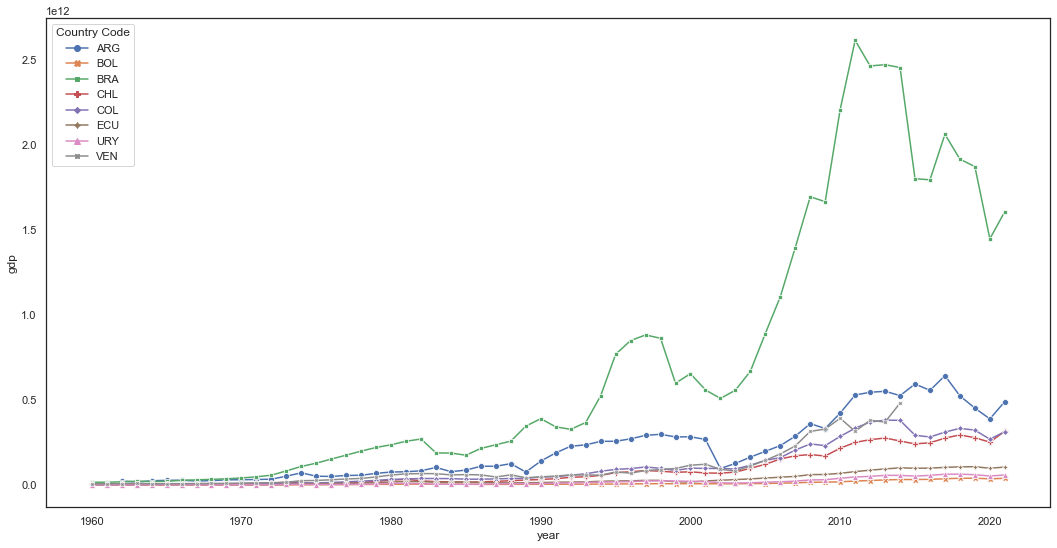

In [42]:
list_countries = ["CHL", "ARG", "COL", "BRA", "BOL", "ECU", "VEN", "URY"]
plt.figure(figsize = (18, 9))
sns.lineplot(data = gdp[gdp["Country Code"].isin(list_countries)], x = "year", y = "gdp", hue = "Country Code", style="Country Code",\
             markers=True, dashes = False)
#plt.legend('', frameon = False)

<AxesSubplot:xlabel='year', ylabel='gdp'>

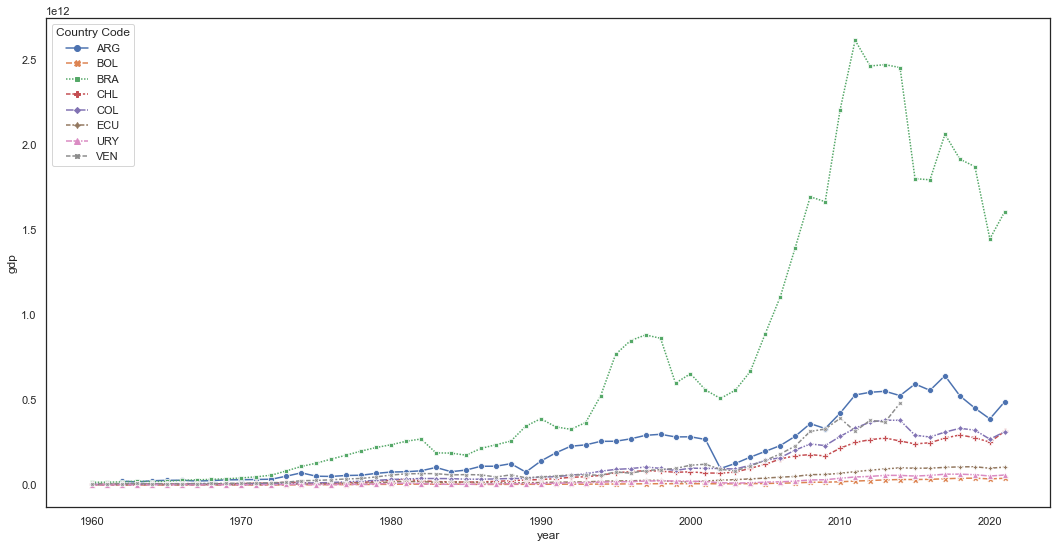

In [43]:
list_countries = ["CHL", "ARG", "COL", "BRA", "BOL", "ECU", "VEN", "URY"]
plt.figure(figsize = (18, 9))
sns.lineplot(data = gdp[gdp["Country Code"].isin(list_countries)], x = "year", y = "gdp", hue = "Country Code", style="Country Code",\
             markers=True)
#plt.legend('', frameon = False)

## 3.8. Gráficos de Pastel (PieChart)

Los gráficos de pastel sirven para observar la distribución o conformación de un grupo respecto a sus categorías. Estas tienen ventajas en demostrar porcentajes frente a un total, pero, en ocasiones, pueden ser problemáticos.

In [44]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5,4,1,0,Iris-setosa
1,2,5,3,1,0,Iris-setosa
2,3,5,3,1,0,Iris-setosa
3,4,5,3,2,0,Iris-setosa
4,5,5,4,1,0,Iris-setosa
...,...,...,...,...,...,...
145,146,7,3,5,2,Iris-virginica
146,147,6,2,5,2,Iris-virginica
147,148,6,3,5,2,Iris-virginica
148,149,6,3,5,2,Iris-virginica


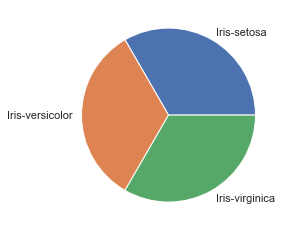

In [45]:
df_temp = iris[["Species", "Id"]].groupby("Species").count().reset_index()
plt.pie(df_temp.Id, labels=df_temp.Species)
plt.show()

Se le puede agregar el porcentaje con el método `autopct`:

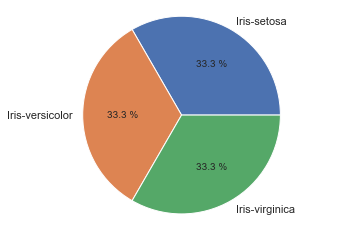

In [46]:
df_temp = iris[["Species", "Id"]].groupby("Species").count().reset_index()
plt.pie(df_temp.Id, labels=df_temp.Species, autopct="%0.1f %%")
plt.axis("equal")
plt.show()